In [14]:
import cv2
import numpy as np
import torch
from PIL import Image
import torchvision
from torchvision import transforms
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os

In [8]:
data = torchvision.datasets.Flowers102('', download=True)
data_loader = torch.utils.data.DataLoader(data,
                                          batch_size=1,
                                          shuffle=True)

  0%|          | 0/344862509 [00:00<?, ?it/s]

Extracting flowers-102/102flowers.tgz to flowers-102


  0%|          | 0/502 [00:00<?, ?it/s]

  0%|          | 0/14989 [00:00<?, ?it/s]

In [16]:
flowers = []

with os.scandir("flowers-102/jpg") as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.jpg'):
          # adds only the image files to the flowers list
            flowers.append(file.name)

In [20]:
data = []

for file in flowers[:1000]:
    input_image = Image.open(f"flowers-102/jpg/{file}")
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0)
    data.append(input_batch)

In [21]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
newmodel = torch.nn.Sequential(*(list(model.children())[:-2]))
list(newmodel.children())[-1]

Using cache found in /home/diler/.cache/torch/hub/pytorch_vision_v0.10.0
/home/diler/miniconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/diler/miniconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (downsample): Sequential(
      (0): Conv2d(256, 512, kernel_size=(1, 1), stride=(2, 2), bias=False)
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): BasicBlock(
    (conv1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(512, eps=1

In [26]:
knn_data = []

for input_batch in data:
    with torch.no_grad():
        output = model(input_batch)
    knn_data.append(output.numpy().reshape(1000,))
knn_data = np.array(knn_data)


In [46]:
kmeans = KMeans(n_clusters=10, random_state=5)
kmeans.fit(knn_data)

/home/diler/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=5)

In [47]:
kmeans.labels_

array([0, 6, 5, 0, 0, 7, 1, 6, 4, 6, 6, 0, 9, 4, 5, 1, 8, 3, 0, 7, 5, 7,
       9, 7, 3, 7, 6, 1, 7, 1, 5, 1, 5, 0, 0, 9, 5, 6, 2, 9, 7, 3, 4, 3,
       7, 8, 0, 5, 0, 4, 6, 6, 0, 9, 7, 0, 0, 1, 6, 5, 6, 8, 4, 7, 3, 6,
       0, 5, 0, 8, 5, 5, 0, 4, 0, 3, 7, 6, 5, 4, 7, 9, 9, 9, 7, 4, 5, 5,
       0, 5, 0, 5, 2, 7, 6, 5, 5, 6, 1, 0, 0, 5, 3, 7, 0, 5, 0, 1, 0, 1,
       4, 5, 8, 8, 7, 2, 8, 7, 1, 4, 0, 3, 1, 1, 6, 9, 0, 7, 4, 6, 5, 0,
       3, 4, 8, 4, 9, 0, 5, 4, 4, 2, 8, 4, 5, 7, 1, 5, 7, 1, 3, 7, 1, 1,
       6, 7, 3, 4, 3, 8, 1, 9, 3, 0, 1, 5, 4, 0, 5, 7, 8, 9, 3, 5, 1, 6,
       9, 2, 1, 6, 0, 1, 4, 6, 8, 5, 6, 8, 7, 3, 8, 1, 3, 3, 6, 1, 5, 3,
       2, 0, 6, 6, 5, 3, 0, 6, 0, 9, 0, 2, 1, 1, 4, 2, 4, 1, 6, 1, 0, 4,
       0, 0, 3, 4, 5, 7, 6, 6, 4, 4, 7, 3, 7, 7, 2, 0, 2, 2, 5, 7, 4, 1,
       1, 9, 1, 4, 5, 3, 8, 8, 1, 1, 1, 2, 7, 9, 4, 0, 4, 7, 2, 1, 2, 0,
       7, 2, 2, 3, 4, 9, 7, 1, 1, 2, 8, 4, 6, 6, 0, 4, 7, 6, 3, 7, 1, 1,
       9, 5, 5, 6, 6, 4, 7, 1, 4, 9, 2, 9, 0, 6, 6,

In [54]:
groups = {}
for file, cluster in zip(flowers,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

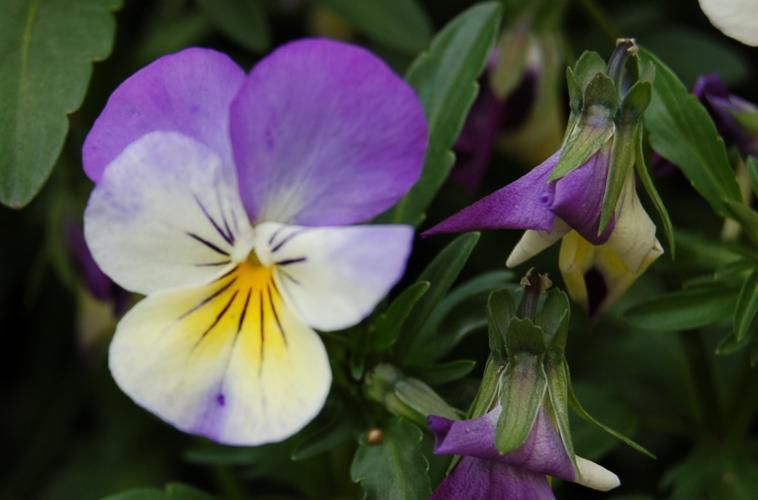

In [75]:
Image.open(f"/home/diler/dev/speleothem/speleothem/neural_network/cluster/flowers-102/jpg/{groups[5][0]}")